In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Data

In [2]:
np.random.seed(42)
m = 100
X_train = 6 * np.random.rand(m, 1) - 3
y_train = 0.5 * X_train ** 2 + X_train + 2 + np.random.randn(m, 1)

In [3]:
X_test = np.linspace(-3, 3, 100).reshape(100,1)

# Polynomial Regression

### ❌ No Pipeline

In [4]:
# adding polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

In [5]:
# scaling the data
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train_poly)

In [6]:
# fitting the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [7]:
# making predictions
X_test_poly = poly_features.transform(X_test)
X_test_scaled = std_scaler.transform(X_test_poly)
predictions = lin_reg.predict(X_test_scaled)

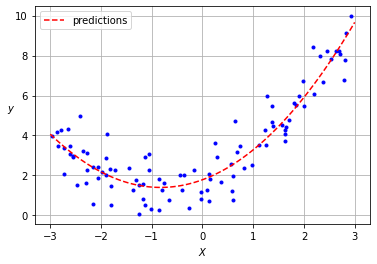

In [8]:
# plotting the results
plt.plot(X_train, y_train, 'b.')
plt.plot(X_test, predictions, 'r--', label='predictions')
plt.xlabel('$X$')
plt.ylabel('$y$', rotation=0)
plt.grid()
plt.legend();

### ✅ Pipeline

In [9]:
# creating the pipeline
poly_features = PolynomialFeatures(degree=2, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

polynomial_regression = make_pipeline(poly_features, std_scaler, lin_reg)

In [10]:
# fitting the pipeline
polynomial_regression.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [11]:
# making predictions
predictions = polynomial_regression.predict(X_test)

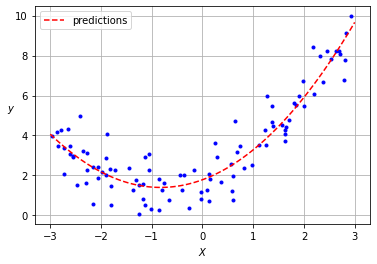

In [12]:
# plotting the results
plt.plot(X_train, y_train, 'b.')
plt.plot(X_test, predictions, 'r--', label='predictions')
plt.xlabel('$X$')
plt.ylabel('$y$', rotation=0)
plt.grid()
plt.legend();